# ROHP-PAZ Data exploration and modelling

### Ignacio Cobas, Didac Gallego (UAB)

## Introduction

### Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import torch


from sklearn.utils import resample
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, PolynomialFeatures


from sklearn.linear_model import TweedieRegressor, PassiveAggressiveRegressor, LogisticRegression, Ridge
from sklearn.linear_model import Lasso, ElasticNet, LassoLars, LinearRegression, BayesianRidge, ARDRegression
from sklearn.linear_model import SGDRegressor, RANSACRegressor, HuberRegressor, QuantileRegressor

from sklearn.cluster import KMeans

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


from sklearn.metrics import mean_squared_error

### Data loading

In [2]:
metadata = pd.read_pickle(r'../data/paz_metadata.pkl')
profiles = pd.read_pickle(r'../data/paz_profiles.pkl')
refractivity = pd.read_pickle(r'../data/paz_refractivity.pkl') 
Pres = pd.read_pickle(r'../data/paz_thermo_wet_Pres.pkl')
Temp = pd.read_pickle(r'../data/paz_thermo_wet_Temp.pkl')
Vp = pd.read_pickle(r'../data/paz_thermo_wet_Vp.pkl')

## Data visualization

### Data description

#### metadata

In [3]:
metadata.head()

,roid,lat,lon,startimeUTC,az_surf,meanP_2,precipBelow12,irTemp_2,irTemp_below,dphi_0010,region,height_flag_comb
0,PAZ1.2018.130.20.55.G18,37.48,126.10,2018-05-10 20:55:41,-30.59,0.00,0.001,248,236,-0.055016,1,0.00000
1,PAZ1.2018.130.21.01.G19,4.68,153.15,2018-05-10 21:01:40,61.29,0.03,0.044,241,211,-0.017083,2,0.00000
2,PAZ1.2018.130.21.10.G24,-16.88,135.77,2018-05-10 21:10:33,19.90,0.00,0.001,231,242,-0.065611,0,2.88408
3,PAZ1.2018.130.21.16.G10,-36.43,112.66,2018-05-10 21:16:14,-7.23,0.00,0.000,283,251,0.020166,1,0.00000
4,PAZ1.2018.130.21.39.G29,-53.91,-64.58,2018-05-10 21:39:06,-147.99,0.01,0.004,248,228,0.030036,1,2.05813


In [4]:
metadata.describe()

,lat,lon,az_surf,meanP_2,precipBelow12,irTemp_2,irTemp_below,dphi_0010,region,height_flag_comb
count,84986.000000,84986.000000,84986.000000,84986.000000,84986.000000,84986.000000,84986.000000,84986.000000,84986.000000,84986.000000
mean,-3.716742,-10.709305,30.281494,0.121057,0.120411,255.879933,252.496599,0.207076,1.197185,0.710863
std,35.406553,107.529302,104.249210,0.552745,0.472742,23.346265,23.060704,8.454202,1.189784,1.067363
min,-54.990000,-180.000000,-180.000000,-4.000000,-4.000000,160.000000,167.000000,-999.000000,0.000000,-2.000000
25%,-36.690000,-104.607500,-8.380000,0.000000,0.000000,238.000000,235.000000,-0.152948,1.000000,0.000000
50%,-10.290000,-24.010000,31.160000,0.000000,0.001000,258.000000,252.000000,0.089501,1.000000,0.000000
75%,29.530000,86.457500,136.990000,0.020000,0.035000,277.000000,273.000000,0.384151,1.000000,1.629630
max,54.990000,180.000000,180.000000,26.660000,17.125000,314.000000,312.000000,32.100500,5.000000,3.499640


#### profiles

In [5]:
profiles.head()

,roid,h020,h022,h024,h026,h028,h030,h032,h034,h036,...,h142,h144,h146,h148,h150,h152,h154,h156,h158,h160
1,PAZ1.2018.130.21.42.G26,-1.09681,-2.445270,0.370995,-0.219867,2.244140,1.955010,1.483930,1.251220,1.598810,...,-0.036065,-0.149420,-0.197623,0.014194,0.009835,0.055199,-0.058731,-0.025363,0.010424,-0.136043
3,PAZ1.2018.130.23.29.G07,NaN,NaN,NaN,NaN,NaN,NaN,2.049420,1.462710,0.054565,...,0.093193,0.029790,-0.031303,-0.010580,-0.119284,-0.095478,-0.094646,-0.187479,-0.096793,-0.019154
9,PAZ1.2018.130.21.53.G05,NaN,NaN,NaN,-0.138501,0.871127,0.882981,1.782420,1.772520,0.512098,...,0.088846,-0.051150,-0.125904,-0.149711,0.007814,-0.038109,0.026671,0.156902,0.002178,0.025415
12,PAZ1.2018.130.21.39.G29,2.87392,0.652973,0.651900,-0.121561,-0.848837,0.227879,-0.525603,-0.434966,-0.208949,...,0.352495,0.325071,0.270465,-0.019309,-0.147347,-0.041957,0.021939,0.169820,0.401755,0.661644
15,PAZ1.2018.130.22.53.G31,7.74517,5.810380,7.534330,7.985820,-5.281560,1.253270,3.316480,3.386730,3.483010,...,0.244428,-0.041983,-0.190033,-0.393716,-0.244994,-0.043441,0.068149,0.265175,0.405946,0.534125


In [6]:
profiles.describe()

,h020,h022,h024,h026,h028,h030,h032,h034,h036,h038,...,h142,h144,h146,h148,h150,h152,h154,h156,h158,h160
count,69070.000000,71530.000000,73811.000000,75685.000000,77212.000000,78393.000000,79502.000000,80190.000000,80696.000000,81218.000000,...,84986.000000,84986.000000,84986.000000,84986.000000,84986.000000,84986.000000,84986.000000,84986.000000,84986.000000,84986.000000
mean,0.491114,0.476273,0.454134,0.437223,0.423723,0.406243,0.400848,0.392430,0.378216,0.373115,...,0.001759,0.000524,-0.000284,-0.001053,-0.001325,-0.002216,-0.003279,-0.002555,-0.002632,-0.001922
std,2.059456,1.977210,1.869412,1.805811,1.732094,1.674123,1.611949,1.536920,1.503112,1.487726,...,0.383299,0.377430,0.373685,0.369527,0.364648,0.361011,0.358887,0.355809,0.353179,0.351472
min,-23.738600,-21.242400,-27.726800,-16.493100,-28.749800,-19.353400,-17.009900,-9.184820,-4.867020,-4.490090,...,-8.543080,-8.178240,-7.467280,-6.973880,-6.458960,-6.140930,-6.014000,-5.542470,-5.222010,-4.861630
25%,-0.475956,-0.454610,-0.433591,-0.423995,-0.400350,-0.390903,-0.373446,-0.354187,-0.350976,-0.335212,...,-0.246117,-0.244617,-0.244572,-0.243947,-0.241033,-0.240495,-0.239773,-0.238904,-0.236055,-0.234718
50%,0.246142,0.228027,0.208413,0.190773,0.173878,0.167341,0.154294,0.145343,0.135165,0.129046,...,-0.001152,-0.000989,-0.002175,-0.002899,-0.002986,-0.002011,-0.003870,-0.003394,-0.003794,-0.003281
75%,1.111282,1.057127,0.980892,0.919378,0.857932,0.813069,0.773727,0.744533,0.702510,0.675850,...,0.246287,0.243340,0.241465,0.237873,0.236500,0.234770,0.231732,0.232236,0.229926,0.231633
max,57.904300,56.014500,52.581400,51.360200,47.411000,45.603300,42.159700,39.174600,35.647600,33.781700,...,5.901610,5.521850,4.975710,4.499640,4.181540,3.812950,3.521430,3.058170,2.691330,2.130050


#### refractivity

In [7]:
refractivity.head()

,roid,h020,h022,h024,h026,h028,h030,h032,h034,h036,...,h142,h144,h146,h148,h150,h152,h154,h156,h158,h160
0,PAZ1.2018.130.22.50.G25,228.839,225.547,222.815,220.260,217.183,211.219,207.209,201.853,196.929,...,51.5438,49.8845,48.3191,46.8733,45.5508,44.2749,42.9986,41.7589,40.6193,39.5591
1,PAZ1.2018.130.21.39.G29,229.724,224.876,219.906,214.477,210.073,205.915,201.247,197.103,192.822,...,47.0849,45.5853,44.1908,42.8528,41.5332,40.2342,38.9756,37.7735,36.6354,35.5577
7,PAZ1.2018.130.21.16.G10,228.471,225.045,221.836,221.962,214.745,210.808,204.393,201.035,196.044,...,51.6280,49.9044,48.3029,46.7910,45.3744,44.0683,42.8802,41.7653,40.6332,39.4444
10,PAZ1.2018.130.20.55.G18,228.571,222.429,216.544,211.031,209.125,202.560,198.375,196.169,191.705,...,52.7661,51.0457,49.3857,47.8109,46.3531,44.9786,43.6063,42.2044,40.8449,39.6448
12,PAZ1.2018.130.21.01.G19,281.826,267.698,260.278,256.801,250.271,240.659,235.688,227.969,221.975,...,57.5309,56.1517,54.7245,53.2481,51.7758,50.3734,49.0549,47.7694,46.4778,45.1863


In [8]:
refractivity.describe()

,h020,h022,h024,h026,h028,h030,h032,h034,h036,h038,...,h142,h144,h146,h148,h150,h152,h154,h156,h158,h160
count,75561.000000,77325.000000,78610.000000,79560.000000,80252.000000,80757.000000,81141.000000,81421.000000,81638.000000,81812.000000,...,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000
mean,246.205539,239.024894,232.327120,226.035252,220.075172,214.398254,208.987141,203.823086,198.824379,193.979502,...,52.545865,51.055297,49.599030,48.175821,46.784235,45.422827,44.090376,42.785809,41.508007,40.255743
std,16.151286,15.382333,14.564658,13.747025,12.960147,12.231440,11.534534,10.873234,10.240546,9.624100,...,4.253726,4.211916,4.162296,4.104837,4.039483,3.966488,3.886274,3.799057,3.704734,3.603057
min,172.462000,169.493000,168.401000,167.876000,169.664000,165.981000,163.529000,162.771000,156.334000,151.382000,...,40.435300,39.254800,37.940700,36.151600,34.747600,33.655000,32.711200,31.817100,31.014700,30.366300
25%,234.530000,227.846000,221.745000,216.014500,210.689000,205.539000,200.643000,195.975000,191.427000,187.028000,...,48.831500,47.367175,45.950550,44.566350,43.225575,41.931150,40.666450,39.437350,38.244875,37.084075
50%,243.174000,236.082000,229.492500,223.313000,217.467500,211.895000,206.614000,201.577000,196.687500,191.961000,...,53.269100,51.693900,50.165450,48.687750,47.231300,45.830550,44.451200,43.108850,41.795300,40.516300
75%,255.507000,247.726000,240.423000,233.583000,227.021500,220.895000,215.076000,209.527000,204.123750,198.883000,...,56.694500,55.178200,53.678325,52.191800,50.736200,49.287900,47.862725,46.457200,45.070000,43.699600
max,312.432000,309.760000,305.519000,301.504000,296.668000,295.605000,291.758000,288.263000,283.286000,271.798000,...,66.030700,64.352800,62.595600,60.710700,58.772200,57.058700,55.750200,54.679800,53.495700,51.804600


#### Pres

In [9]:
Pres.head()

,roid,h020,h022,h024,h026,h028,h030,h032,h034,h036,...,h142,h144,h146,h148,h150,h152,h154,h156,h158,h160
0,PAZ1.2018.130.22.50.G25,809.779,790.420,771.446,752.837,734.577,716.672,699.113,681.894,665.038,...,142.649,138.208,133.909,129.742,125.696,121.763,117.943,114.233,110.628,107.1180
1,PAZ1.2018.130.21.39.G29,786.016,766.121,746.710,727.751,709.209,691.047,673.270,655.869,638.843,...,130.946,126.882,122.945,119.128,115.427,111.842,108.369,105.005,101.743,98.5785
7,PAZ1.2018.130.21.16.G10,809.820,790.439,771.432,752.773,734.491,716.586,699.047,681.881,665.063,...,142.799,138.354,134.055,129.892,125.857,121.942,118.136,114.431,110.825,107.3200
10,PAZ1.2018.130.20.55.G18,803.266,784.118,765.361,746.974,728.934,711.239,693.898,676.894,660.218,...,144.556,140.011,135.614,131.358,127.236,123.238,119.360,115.603,111.968,108.4460
12,PAZ1.2018.130.21.01.G19,802.872,784.216,765.930,747.996,730.407,713.163,696.255,679.667,663.392,...,152.550,147.584,142.740,138.021,133.434,128.970,124.628,120.397,116.281,112.2750


In [10]:
Pres.describe()

,h020,h022,h024,h026,h028,h030,h032,h034,h036,h038,...,h142,h144,h146,h148,h150,h152,h154,h156,h158,h160
count,79119.000000,79926.000000,80538.000000,80963.000000,81289.000000,81543.000000,81721.000000,81894.000000,82042.000000,82167.000000,...,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000
mean,797.207746,778.072652,759.312170,740.920458,722.896282,705.235424,687.935562,670.994123,654.398833,638.144321,...,143.659749,139.125270,134.719990,130.440902,126.285206,122.250178,118.333218,114.531898,110.843756,107.266528
std,11.041273,11.281949,11.532936,11.788005,12.035733,12.276772,12.514877,12.741445,12.958307,13.167262,...,8.436893,8.081977,7.731182,7.385294,7.045206,6.711712,6.385573,6.067585,5.758415,5.458804
min,715.160000,699.182000,683.466000,668.006000,652.740000,637.672000,622.986000,606.587000,590.125000,574.173000,...,111.098000,107.534000,104.084000,100.748000,97.524200,94.408200,91.395700,88.484900,85.671200,82.950800
25%,792.611500,773.203250,754.166250,735.475500,717.123000,699.150500,681.538000,664.329000,647.458000,630.957000,...,137.073750,132.854750,128.770000,124.806750,120.955000,117.234000,113.617000,110.110000,106.708750,103.409000
50%,801.256000,782.367500,763.820000,745.648000,727.820000,710.315000,693.140000,676.336000,659.839500,643.679000,...,145.537000,140.948000,136.491000,132.166000,127.969000,123.881500,119.937000,116.104000,112.388500,108.780000
75%,804.505000,785.619000,767.139000,749.031000,731.288000,713.907500,696.892000,680.219000,663.880000,647.878000,...,151.367000,146.470000,141.704000,137.067000,132.564000,128.182000,123.929000,119.798000,115.789000,111.903000
max,872.021000,850.592000,829.601000,836.825000,817.165000,797.905000,779.033000,760.540000,742.420000,724.665000,...,161.647000,155.947000,150.399000,145.009000,140.171000,135.688000,131.312000,127.042000,122.883000,118.836000


#### Temp

In [11]:
Temp.head()

,roid,h020,h022,h024,h026,h028,h030,h032,h034,h036,...,h142,h144,h146,h148,h150,h152,h154,h156,h158,h160
0,PAZ1.2018.130.22.50.G25,282.284,281.199,279.875,278.301,276.752,275.475,273.887,272.737,271.590,...,214.790,215.010,215.063,214.802,214.163,213.420,212.870,212.270,211.363,210.142
1,PAZ1.2018.130.21.39.G29,266.461,266.437,265.956,265.264,264.011,262.649,261.492,260.237,259.037,...,215.821,215.992,215.902,215.731,215.673,215.721,215.771,215.728,215.512,215.145
7,PAZ1.2018.130.21.16.G10,282.169,280.780,279.304,277.542,276.714,275.475,274.653,273.422,272.273,...,214.665,215.147,215.379,215.436,215.258,214.736,213.798,212.625,211.657,211.147
10,PAZ1.2018.130.20.55.G18,283.002,282.130,281.044,279.778,278.042,276.938,275.554,274.009,272.535,...,212.624,212.878,213.106,213.230,213.009,212.653,212.424,212.567,212.736,212.270
12,PAZ1.2018.130.21.01.G19,288.151,287.440,286.372,285.080,283.926,282.935,281.595,280.283,278.860,...,205.877,204.040,202.465,201.197,200.026,198.729,197.139,195.627,194.143,192.828


In [12]:
Temp.describe()

,h020,h022,h024,h026,h028,h030,h032,h034,h036,h038,...,h142,h144,h146,h148,h150,h152,h154,h156,h158,h160
count,79119.000000,79926.000000,80538.000000,80963.000000,81289.000000,81543.000000,81721.000000,81894.000000,82042.000000,82167.000000,...,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000
mean,280.228762,279.160210,278.057891,276.949998,275.833730,274.756167,273.663857,272.532889,271.407536,270.258226,...,212.621462,211.965029,211.321359,210.696383,210.091974,209.516979,208.967027,208.463127,207.989097,207.571022
std,10.099373,9.913802,9.781600,9.699785,9.627385,9.594387,9.604145,9.588219,9.596606,9.624110,...,6.068142,6.453553,6.849448,7.244463,7.633741,8.008268,8.377295,8.714276,9.041945,9.328999
min,234.148000,233.164000,234.158000,233.086000,231.095000,229.525000,228.487000,227.203000,226.534000,226.401000,...,186.436000,187.432000,185.269000,184.541000,183.008000,179.831000,177.247000,175.971000,174.442000,173.289000
25%,273.120000,272.146000,271.168000,270.100000,269.079000,268.030000,266.963000,265.862000,264.782000,263.613500,...,207.417000,206.274000,205.152000,204.074000,203.052000,202.070750,201.143000,200.309000,199.568000,198.886000
50%,282.424000,281.443000,280.394000,279.336000,278.219000,277.150000,276.105000,274.985000,273.892000,272.774000,...,211.423500,210.875000,210.388000,209.937000,209.469000,209.018500,208.601000,208.238000,207.902000,207.575500
75%,288.259500,287.254750,286.210750,285.145000,284.040000,282.962000,281.870000,280.711000,279.566000,278.400000,...,217.239250,217.008000,216.769000,216.529000,216.310000,216.102000,215.909250,215.731000,215.579000,215.442000
max,331.318000,322.591000,310.933000,309.291000,303.789000,297.355000,296.991000,295.130000,292.504000,295.093000,...,236.735000,236.927000,238.299000,243.060000,245.984000,247.020000,247.248000,247.308000,246.800000,245.240000


#### Vp

In [13]:
Vp.head()

,roid,h020,h022,h024,h026,h028,h030,h032,h034,h036,...,h142,h144,h146,h148,h150,h152,h154,h156,h158,h160
0,PAZ1.2018.130.22.50.G25,1.364010,1.621750,1.890060,2.157550,2.292920,1.883550,1.863100,1.538140,1.334780,...,0.000954,0.000831,0.000724,0.000632,0.000554,0.000516,0.000486,0.000458,0.000431,0.000407
1,PAZ1.2018.130.21.39.G29,0.175622,0.321243,0.388881,0.303473,0.302557,0.309994,0.274984,0.281953,0.259538,...,0.000535,0.000502,0.000477,0.000461,0.000444,0.000428,0.000412,0.000397,0.000384,0.000385
7,PAZ1.2018.130.21.16.G10,1.217430,1.405180,1.614040,2.407110,1.759320,1.850400,1.427540,1.485760,1.283790,...,0.000987,0.000854,0.000739,0.000641,0.000560,0.000520,0.000490,0.000462,0.000436,0.000410
10,PAZ1.2018.130.20.55.G18,1.796720,1.463600,1.112740,0.770508,1.150090,0.664193,0.570921,0.845821,0.757182,...,0.001481,0.001213,0.000993,0.000813,0.000667,0.000570,0.000541,0.000513,0.000486,0.000461
12,PAZ1.2018.130.21.01.G19,14.639000,12.370800,11.566700,11.608200,10.972000,9.671800,9.263760,8.409680,7.914390,...,0.003695,0.002991,0.002366,0.001922,0.001534,0.001213,0.000965,0.000817,0.000645,0.000518


In [14]:
Vp.describe()

,h020,h022,h024,h026,h028,h030,h032,h034,h036,h038,...,h142,h144,h146,h148,h150,h152,h154,h156,h158,h160
count,79119.000000,79926.000000,80538.000000,80963.000000,81289.000000,81543.000000,81721.000000,81894.000000,82042.000000,82167.000000,...,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000,84984.000000
mean,5.426105,4.828104,4.311708,3.865789,3.476094,3.141167,2.848961,2.591633,2.357970,2.143909,...,0.001546,0.001336,0.001161,0.001014,0.000891,0.000791,0.000711,0.000654,0.000602,0.000556
std,4.089540,3.838550,3.589536,3.347761,3.112713,2.894712,2.686524,2.493972,2.310543,2.137608,...,0.001117,0.000888,0.000703,0.000555,0.000438,0.000345,0.000272,0.000223,0.000184,0.000153
min,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000117,0.000126,0.000046,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000002
25%,2.160385,1.775197,1.466980,1.219060,1.033050,0.882954,0.771833,0.679423,0.606137,0.542174,...,0.000671,0.000633,0.000598,0.000566,0.000539,0.000518,0.000499,0.000481,0.000462,0.000443
50%,4.252000,3.646010,3.136540,2.729660,2.374930,2.072000,1.828840,1.624515,1.445985,1.283540,...,0.001106,0.000992,0.000891,0.000801,0.000723,0.000663,0.000619,0.000583,0.000549,0.000514
75%,7.863925,7.027600,6.309085,5.686690,5.138150,4.651260,4.215130,3.828737,3.463312,3.120715,...,0.002171,0.001859,0.001605,0.001383,0.001188,0.001019,0.000886,0.000794,0.000714,0.000645
max,19.972700,18.247000,17.069500,16.364400,16.642500,14.769300,13.517200,12.898500,12.031800,11.294100,...,0.013905,0.011189,0.008990,0.007199,0.005738,0.004504,0.003509,0.002886,0.002410,0.001999


### Cleaning up data

In [15]:
# doesnt work with metadata
def cleanup(data, threshold=0.05):
    min_height = np.argmax(data.isna().mean(axis=0).values[1:] < threshold)
    
    data = pd.concat([data.iloc[:, 0], data.iloc[:, min_height:]], axis=1)
    data = data[data.notna().all(axis=1)]
    data = data.reset_index(drop=True)
    
    return data

#### metadata

In [16]:
(metadata.dphi_0010 < -2).sum()

10

In [17]:
(metadata.meanP_2 < 0).sum()

18

In [18]:
metadata = metadata[metadata.dphi_0010 > -2]
metadata = metadata[metadata.meanP_2 >= 0]

#### profiles

In [19]:
profiles = cleanup(profiles, 0.05)

#### refractivity

In [20]:
refractivity = cleanup(refractivity, 0.05)

#### Pres

In [21]:
Pres = cleanup(Pres, 0.05)

#### Temp

In [22]:
Temp = cleanup(Temp, 0.05)

#### Vp

In [23]:
Vp = cleanup(Vp, 0.05)

## Data transformation

### Changing column names

In [24]:
profiles_columns = ('profiles_' + profiles.columns[1:]).tolist()
profiles_columns.insert(0, 'roid')
profiles_columns = dict( zip(profiles.columns, profiles_columns) )

In [25]:
profiles = profiles.rename(columns=profiles_columns)

In [26]:
refractivity_columns = ('refractivity_' + refractivity.columns[1:]).tolist()
refractivity_columns.insert(0, 'roid')
refractivity_columns = dict( zip(refractivity.columns, refractivity_columns) )

In [27]:
refractivity = refractivity.rename(columns=refractivity_columns)

In [28]:
Pres_columns = ('Pres_' + Pres.columns[1:]).tolist()
Pres_columns.insert(0, 'roid')
Pres_columns = dict( zip(Pres.columns, Pres_columns) )

In [29]:
Pres = Pres.rename(columns=Pres_columns)

In [30]:
Temp_columns = ('Temp_' + Temp.columns[1:]).tolist()
Temp_columns.insert(0, 'roid')
Temp_columns = dict( zip(Temp.columns, Temp_columns) )

In [31]:
Temp = Temp.rename(columns=Temp_columns)

In [32]:
Vp_columns = ('Vp_' + Vp.columns[1:]).tolist()
Vp_columns.insert(0, 'roid')
Vp_columns = dict( zip(Vp.columns, Vp_columns) )

In [33]:
Vp = Vp.rename(columns=Vp_columns)

### Merging all data

In [34]:
data = [profiles, refractivity, Pres, Temp, Vp]
data_columns = [profiles_columns, refractivity_columns, Pres_columns, Temp_columns, Vp_columns]

In [35]:
min_height = 2 + 0.2*(72-min([len(c) for c in data_columns]))
if min_height >= 10:
    start_name = 'h' + str(int(min_height * 10))
else:
    start_name = 'h' + '0' + str(int(min_height * 10))

In [36]:
for i in range(len(data)):
    index = list(data_columns[i].keys()).index(start_name)
    data[i] = data[i].drop(columns=data[i].columns[1:index])

In [37]:
profiles, refractivity, Pres, Temp, Vp = data

In [38]:
full_data = metadata.merge(profiles).merge(refractivity).merge(Pres).merge(Temp).merge(Vp).drop(['az_surf', 'meanP_2', 'precipBelow12', 'irTemp_below', 'startimeUTC', 'dphi_0010', 'region', 'height_flag_comb'], axis=1)

In [39]:
full_data.head()

,roid,lat,lon,irTemp_2,profiles_h036,profiles_h038,profiles_h040,profiles_h042,profiles_h044,profiles_h046,...,Vp_h142,Vp_h144,Vp_h146,Vp_h148,Vp_h150,Vp_h152,Vp_h154,Vp_h156,Vp_h158,Vp_h160
0,PAZ1.2018.130.20.55.G18,37.48,126.10,248,-0.106622,-0.169008,1.897890,1.593650,2.531510,2.234040,...,0.001481,0.001213,0.000993,0.000813,0.000667,0.000570,0.000541,0.000513,0.000486,0.000461
1,PAZ1.2018.130.21.01.G19,4.68,153.15,241,-0.358579,0.625408,-0.823484,-0.457033,0.424057,0.739427,...,0.003695,0.002991,0.002366,0.001922,0.001534,0.001213,0.000965,0.000817,0.000645,0.000518
2,PAZ1.2018.130.21.10.G24,-16.88,135.77,231,-0.722735,-0.492319,0.358507,-0.264436,0.682555,0.526622,...,0.002862,0.002370,0.001966,0.001630,0.001351,0.001120,0.000946,0.000843,0.000752,0.000670
3,PAZ1.2018.130.21.16.G10,-36.43,112.66,283,-0.855325,-0.502248,-0.352526,-0.611806,-1.137040,-0.891492,...,0.000987,0.000854,0.000739,0.000641,0.000560,0.000520,0.000490,0.000462,0.000436,0.000410
4,PAZ1.2018.130.21.39.G29,-53.91,-64.58,248,-0.208949,-0.162441,0.417120,0.428870,0.740477,0.140369,...,0.000535,0.000502,0.000477,0.000461,0.000444,0.000428,0.000412,0.000397,0.000384,0.000385


### Selecting columns and rows

In [40]:
def get_data_height(full_data, min_height, max_height=None, n_cols = 1):  
    if max_height is None:
        max_height = min_height + 0.1

    min_min_height = int(full_data.columns[4][-3:])
    max_max_height = int(full_data.columns[-1][-3:])

        
    shift = int((max_max_height - min_min_height) / 2 + 1)

    if min_height >= 10:
        start_name = 'profiles_h' + str(int(min_height * 10))
    else:
        start_name = 'profiles_h' + '0' + str(int(min_height * 10))

    start = np.where(full_data.columns == start_name)[0][0]

    data_columns = [full_data.columns[start+shift*i:start+shift*i+n_cols].tolist() for i in range(5)]
    data_columns = sum(data_columns, ['lat', 'lon', 'irTemp_2']) # flatten and add columns lat lon irTemp_2

    data = full_data.loc[:, data_columns]
    
    return data


def get_y_column(data, height):
    if height >= 10:
        y_name = 'profiles_h' + str(int(height * 10))
    else:
        y_name = 'profiles_h' + '0' + str(int(height * 10))
    y_column = np.where(data.columns == y_name)[0][0]
    
    return y_column

In [41]:
height = 4.4

In [42]:
data = get_data_height(full_data, height)

In [43]:
data.head()

,lat,lon,irTemp_2,profiles_h044,refractivity_h044,Pres_h044,Temp_h044,Vp_h044
0,37.48,126.10,248,2.531510,183.617,596.561,265.545,1.856050
1,4.68,153.15,241,0.424057,196.695,601.356,273.844,5.352540
2,-16.88,135.77,231,0.682555,172.490,603.802,276.874,0.660795
3,-36.43,112.66,283,-1.137040,181.244,601.075,266.696,1.221930
4,-53.91,-64.58,248,0.740477,176.416,574.440,254.722,0.246696


## Model

### Linear regressors

In [44]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [45]:
y_column = get_y_column(data, height)

In [46]:
X = np.concatenate([data_scaled[:, :y_column], data_scaled[:, y_column+1:]], axis=1)
y = data_scaled[:, y_column]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [48]:
regressors = [TweedieRegressor(), PassiveAggressiveRegressor(), Ridge(), Lasso(), LassoLars(), ElasticNet(), LinearRegression(), BayesianRidge(), ARDRegression(), SGDRegressor(), RANSACRegressor(), HuberRegressor()]

In [49]:
error_regressors = []
for reg in regressors:
    reg.fit(X_train, y_train)
    error_regressors.append(mean_squared_error(reg.predict(X_test), y_test))
error_regressors

/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


[0.8685663229877765,
 1.4788431782859324,
 0.8494640288089945,
 1.014519352252212,
 1.014519352252212,
 1.014519352252212,
 0.850455206038129,
 0.8502182731546646,
 0.8505484303105891,
 0.837938837523323,
 1.5459696935415286,
 0.890221778449942]

In [50]:
reg = regressors[np.argmin(error_regressors)]
reg

SGDRegressor()

/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

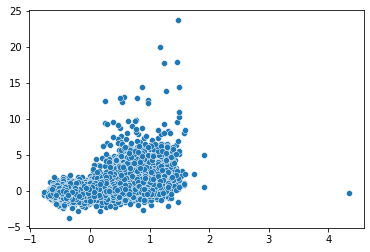

In [51]:
sns.scatterplot(reg.predict(X_test), y_test)

### Polynomial regressor

In [52]:
error = []

for d in range(1, 5):
    poly = PolynomialFeatures(degree=d)
    poly = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly, y)
    
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    
    error.append(mean_squared_error(reg.predict(X_test), y_test))
error

[0.8121015400525871,
 0.7675093614106374,
 0.6842593740313558,
 0.7124929290175164]

In [53]:
poly = PolynomialFeatures(degree=np.argmin(error) + 1) # 3 seems to be the best, anything bigger than 5 is really bad
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [54]:
mean_squared_error(reg.predict(X_test), y_test)

0.6763134920301653

/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

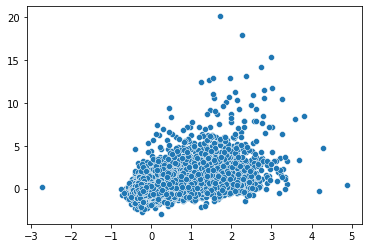

In [55]:
sns.scatterplot(reg.predict(X_test), y_test)

### Classificators

In [56]:
def classify_data(data, height=12, profile_threshold=4):
    if height >= 10:
        profile = 'profiles_h' + str(int(height * 10))
    else:
        profile = 'profiles_h' + '0' + str(int(height * 10))
    
    data_classified = pd.DataFrame(data[data.columns].values, columns=data.columns)
    data_classified['rain'] = 0
    
    data_classified.loc[data_classified[profile] > profile_threshold, 'rain'] = 1
    data_classified.loc[data_classified[profile] <= profile_threshold, 'rain'] = -1
    data_classified = data_classified.drop(profile, axis=1)
    
    return data_classified

In [57]:
profile_threshold = 4

In [58]:
data.head()

,lat,lon,irTemp_2,profiles_h044,refractivity_h044,Pres_h044,Temp_h044,Vp_h044
0,37.48,126.10,248,2.531510,183.617,596.561,265.545,1.856050
1,4.68,153.15,241,0.424057,196.695,601.356,273.844,5.352540
2,-16.88,135.77,231,0.682555,172.490,603.802,276.874,0.660795
3,-36.43,112.66,283,-1.137040,181.244,601.075,266.696,1.221930
4,-53.91,-64.58,248,0.740477,176.416,574.440,254.722,0.246696


In [59]:
data_classifiers = classify_data(data, height=height, profile_threshold=profile_threshold)

X = data_classifiers.iloc[:, :-1]
y = data_classifiers.iloc[:, -1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [62]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
]

#     SVC(kernel="linear", C=0.025),

In [64]:
error_classifiers = []
for clf in classifiers[:2]:
    clf.fit(X_train, y_train)
    error_classifiers.append(clf.score(X_test, y_test))
error_classifiers

[0.9731250313959914, 0.9776962877379816]

In [65]:
clf = classifiers[np.argmax(error_classifiers)]
clf

SVC(C=1, gamma=2)

In [66]:
(data_classifiers.rain == -1).mean()

0.975962625273152

The good results are probably a consequence of the imbalanced dataset, so it should be a good idea to upsample the rain class.

#### Upsampling

In [68]:
def upsample(full_data, column, value1, value2, final_size):
    data = full_data[full_data[column] == value1]
    data = torch.tensor(data[data.columns].values)
    
    data = data.transpose(-1, 0)
    data = data.view(1, data.shape[0], data.shape[1])
    
    upsampler = torch.nn.Upsample(size=final_size, mode='nearest')
    data = upsampler(data)
    
    data = data.view(data.shape[1], final_size)
    data = data.transpose(-1, 0)
    
    data = pd.DataFrame(data, columns=full_data.columns)
    data = pd.concat([data, full_data.loc[full_data[column] == value2]])
    
    return data

In [69]:
column = 'rain'
value1 = 1
value2 = -1
final_size = data_classifiers[data_classifiers.rain == -1].count()[0]

data_classifiers_train = data_classifiers[:int(data_classifiers.shape[0]*0.8)]
data_classifiers_test = data_classifiers[int(data_classifiers.shape[0]*0.8):]

data_upsampled = upsample(data_classifiers_train, column, value1, value2, final_size)

In [70]:
X = data_upsampled.iloc[:, :-1]
y = data_upsampled.iloc[:, -1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [71]:
X_train = X
X_test = data_classifiers_test.iloc[:, :-1]
y_train = y
y_test = data_classifiers_test.iloc[:, -1]

In [72]:
error_classifiers = []
for clf in classifiers[:2]:
    clf.fit(X_train, y_train)
    error_classifiers.append(clf.score(X_test, y_test))
error_classifiers

/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


[0.719264096446063, 0.9737536104483235]

In [73]:
clf = classifiers[np.argmax(error_classifiers)]
print(clf)
print(clf.score(X_test, y_test))

SVC(C=1, gamma=2)


/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.9737536104483235


#### Upsampling with SMOTE

In [74]:
def upsample_SMOTE(X_train, y_train, ratio=1.0):
    """Upsamples minority class using SMOTE.
    Ratio argument is the percentage of the upsampled minority class in relation
    to the majority class. Default is 1.0
    """
    sm = SMOTE(random_state=23, sampling_strategy=ratio)
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    print(len(X_train_sm), len(y_train_sm))
    return X_train_sm, y_train_sm

In [75]:
X = data_classifiers.iloc[:, :-1]
y = data_classifiers.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train, y_train = upsample_SMOTE(X_train, y_train)

116582 116582


In [ ]:
error_classifiers = []
for clf in classifiers[:2]:
    clf.fit(X_train, y_train)
    error_classifiers.append(clf.score(X_test, y_test))
error_classifiers

In [ ]:
clf = classifiers[np.argmax(error_classifiers)]
print(clf)
print(clf.score(X_test, y_test))

### Best Model

#### Train

In [89]:
height = 12
profile_threshold = 4
column = 'rain'
value1 = 1
value2 = -1
final_size = data_classifiers[data_classifiers.rain == -1].count()[0]

In [90]:
data = get_data_height(full_data, height)
data = classify_data(data, height, profile_threshold)

data_classifiers_train = data[:int(data.shape[0]*0.8)]
data_classifiers_test = data[int(data.shape[0]*0.8):]

data_upsampled = upsample(data_classifiers_train, column, value1, value2, final_size)

In [86]:
X = data_upsampled.iloc[:, :-1]
y = data_upsampled.iloc[:, -1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [91]:
X_train = X
X_test = data_classifiers_test.iloc[:, :-1]
y_train = y
y_test = data_classifiers_test.iloc[:, -1]

In [92]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [94]:
clf.score(X_train, y_train)

0.9039566597101117

#### Test

In [93]:
clf.score(X_test, y_test)

/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.4422328268240613

In [95]:
(clf.predict(X_test) == y_test).mean()

/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.4422328268240613

In [96]:
(clf.predict(X_test[y_test == 1]) == 1).mean()

/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.6

In [97]:
(clf.predict(X_test[y_test == -1]) == -1).mean()

/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.44208409276601096

### One model per layer

In [103]:
def one_model_per_layer(full_data, parameters):
    profile_threshold = parameters['profile_threshold']
    column = parameters['column']
    value1 = parameters['value1']
    value2 = parameters['value2']
    final_size = parameters['final_size']

    max_height = parameters['max_height']
    min_height = parameters['min_height']
    step = parameters['step']

    scores = {'Heights': list(range(min_height, max_height, step)), 'Total': [], 'Rain': [], 'NoRain': []}

    for height in range(min_height, max_height, step):
        # Train
        height = height/10

        try:
            data = get_data_height(full_data, height)
        except IndexError: # too low or too high
            scores['Total'].append(-1)
            scores['Rain'].append(-1)
            scores['NoRain'].append(-1)

            continue

        data = classify_data(data, height, profile_threshold)

        data_train = data[:int(data.shape[0]*0.8)]
        data_test = data[int(data.shape[0]*0.8):]

        try: # only one class exists
            data_upsampled = upsample(data_train, column, value1, value2, final_size)
        except RuntimeError:
            scores['Total'].append(-1)
            scores['Rain'].append(-1)
            scores['NoRain'].append(-1)

            continue

        # scaler = StandardScaler()
        # X = scaler.fit_transform(X) # works better without scaling data

        X_train = data_upsampled.iloc[:, :-1]
        X_test = data_classifiers_test.iloc[:, :-1]
        y_train = data_upsampled.iloc[:, -1]
        y_test = data_classifiers_test.iloc[:, -1]

        try:
            clf.fit(X_train, y_train)

            # Test
            # X_test = scaler.fit_transform(X_test) # works better without scaling data

            scores['Total'].append(clf.score(X_test, y_test))
            scores['Rain'].append((clf.predict(X_test[y_test == 1]) == 1).mean())
            scores['NoRain'].append((clf.predict(X_test[y_test == -1]) == -1).mean())

        except ValueError: # there are NaN or Inf values 
            scores['Total'].append(-1)
            scores['Rain'].append(-1)
            scores['NoRain'].append(-1)
    
    return scores

In [99]:
def print_scores(scores, parameters):
    # The data below 3.4 km usually has too many NaN values and thus has been deleted,
    # but -1 is printed in case the threshold is decresed
    # Data above 15 km usually has no rain clouds so it only has one class and can not be properlly classified
    # but -1 is printed in case profile threshold is changed
    
    print("{:<8} {:<8} {:<8} {:<8}".format('Heights', 'Total', 'Rain', 'NoRain'))

    for i in range(int((parameters['max_height'] - parameters['min_height']) / parameters['step'] + 1)):
            height = scores['Heights'][i]
            total = scores['Total'][i]
            rain = scores['Rain'][i]
            norain = scores['NoRain'][i]
            print("{:<8} {:<8.4f} {:<8.4f} {:<8.4f}".format(height, total, rain, norain))
        


In [117]:
parameters = {
    'profile_threshold': 2.5,
    'column': 'rain',
    'value1': 1,
    'value2': -1,
    'final_size': data_classifiers[data_classifiers.rain == -1].count()[0],
    'max_height': 161,
    'min_height': 36,
    'step': 2,
}

In [121]:
data[int(data.shape[0]*0.8):]

,lat,lon,irTemp_2,refractivity_h120,Pres_h120,Temp_h120,Vp_h120,rain
63700,-20.48,-165.22,241.0,73.0374,212.402,225.707,0.002386,-1
63701,28.06,164.84,252.0,74.5485,215.093,224.324,0.019362,-1
63702,46.30,-172.42,271.0,66.3217,192.618,225.401,0.001857,-1
63703,24.47,-27.04,283.0,74.7166,209.931,218.234,0.009416,-1
63704,-21.84,-19.19,283.0,75.3562,213.774,220.385,0.012052,-1
...,...,...,...,...,...,...,...,...
79621,-17.20,134.01,296.0,74.0339,216.320,226.877,0.006945,-1
79622,-32.22,100.79,278.0,73.7522,207.932,219.007,0.009937,-1
79623,21.86,-84.23,270.0,75.3777,212.875,219.414,0.011567,-1
79624,29.51,-88.14,268.0,74.2901,208.234,217.838,0.014262,-1


In [118]:
scores = one_model_per_layer(full_data, parameters)

/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pres_h120
- Temp_h120
- Vp_h120
- refractivity_h120
Feature names seen at fit time, yet now missing:
- Pres_h036
- Temp_h036
- Vp_h036
- refractivity_h036

  warnings.warn(message, FutureWarning)
/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pres_h120
- Temp_h120
- Vp_h120
- refractivity_h120
Feature names seen at fit time, yet now missing:
- Pres_h036
- Temp_h036
- Vp_h036
- refractivity_h036

  warnings.warn(message, FutureWarning)
/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-pack

/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pres_h120
- Temp_h120
- Vp_h120
- refractivity_h120
Feature names seen at fit time, yet now missing:
- Pres_h048
- Temp_h048
- Vp_h048
- refractivity_h048

  warnings.warn(message, FutureWarning)
/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pres_h120
- Temp_h120
- Vp_h120
- refractivity_h120
Feature names seen at fit time, yet now missing:
- Pres_h048
- Temp_h048
- Vp_h048
- refractivity_h048

  warnings.warn(message, FutureWarning)
/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-pack

/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pres_h120
- Temp_h120
- Vp_h120
- refractivity_h120
Feature names seen at fit time, yet now missing:
- Pres_h060
- Temp_h060
- Vp_h060
- refractivity_h060

  warnings.warn(message, FutureWarning)
/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pres_h120
- Temp_h120
- Vp_h120
- refractivity_h120
Feature names seen at fit time, yet now missing:
- Pres_h060
- Temp_h060
- Vp_h060
- refractivity_h060

  warnings.warn(message, FutureWarning)
/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-pack

/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pres_h120
- Temp_h120
- Vp_h120
- refractivity_h120
Feature names seen at fit time, yet now missing:
- Pres_h072
- Temp_h072
- Vp_h072
- refractivity_h072

  warnings.warn(message, FutureWarning)
/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pres_h120
- Temp_h120
- Vp_h120
- refractivity_h120
Feature names seen at fit time, yet now missing:
- Pres_h072
- Temp_h072
- Vp_h072
- refractivity_h072

  warnings.warn(message, FutureWarning)
/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-pack

/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pres_h120
- Temp_h120
- Vp_h120
- refractivity_h120
Feature names seen at fit time, yet now missing:
- Pres_h084
- Temp_h084
- Vp_h084
- refractivity_h084

  warnings.warn(message, FutureWarning)
/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pres_h120
- Temp_h120
- Vp_h120
- refractivity_h120
Feature names seen at fit time, yet now missing:
- Pres_h084
- Temp_h084
- Vp_h084
- refractivity_h084

  warnings.warn(message, FutureWarning)
/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-pack

/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pres_h120
- Temp_h120
- Vp_h120
- refractivity_h120
Feature names seen at fit time, yet now missing:
- Pres_h096
- Temp_h096
- Vp_h096
- refractivity_h096

  warnings.warn(message, FutureWarning)
/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pres_h120
- Temp_h120
- Vp_h120
- refractivity_h120
Feature names seen at fit time, yet now missing:
- Pres_h096
- Temp_h096
- Vp_h096
- refractivity_h096

  warnings.warn(message, FutureWarning)
/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-pack

/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pres_h120
- Temp_h120
- Vp_h120
- refractivity_h120
Feature names seen at fit time, yet now missing:
- Pres_h108
- Temp_h108
- Vp_h108
- refractivity_h108

  warnings.warn(message, FutureWarning)
/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pres_h120
- Temp_h120
- Vp_h120
- refractivity_h120
Feature names seen at fit time, yet now missing:
- Pres_h108
- Temp_h108
- Vp_h108
- refractivity_h108

  warnings.warn(message, FutureWarning)
/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-pack

/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pres_h120
- Temp_h120
- Vp_h120
- refractivity_h120
Feature names seen at fit time, yet now missing:
- Pres_h122
- Temp_h122
- Vp_h122
- refractivity_h122

  warnings.warn(message, FutureWarning)
/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pres_h120
- Temp_h120
- Vp_h120
- refractivity_h120
Feature names seen at fit time, yet now missing:
- Pres_h122
- Temp_h122
- Vp_h122
- refractivity_h122

  warnings.warn(message, FutureWarning)
/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-pack

/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pres_h120
- Temp_h120
- Vp_h120
- refractivity_h120
Feature names seen at fit time, yet now missing:
- Pres_h134
- Temp_h134
- Vp_h134
- refractivity_h134

  warnings.warn(message, FutureWarning)
/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pres_h120
- Temp_h120
- Vp_h120
- refractivity_h120
Feature names seen at fit time, yet now missing:
- Pres_h134
- Temp_h134
- Vp_h134
- refractivity_h134

  warnings.warn(message, FutureWarning)
/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-pack

/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pres_h120
- Temp_h120
- Vp_h120
- refractivity_h120
Feature names seen at fit time, yet now missing:
- Pres_h146
- Temp_h146
- Vp_h146
- refractivity_h146

  warnings.warn(message, FutureWarning)
/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pres_h120
- Temp_h120
- Vp_h120
- refractivity_h120
Feature names seen at fit time, yet now missing:
- Pres_h146
- Temp_h146
- Vp_h146
- refractivity_h146

  warnings.warn(message, FutureWarning)
/mnt/c/Users/admin/Desktop/Nacho/PAZ/notebooks/.venv/lib/python3.8/site-pack

In [119]:
print_scores(scores, parameters)

Heights  Total    Rain     NoRain  
36       0.9336   0.0000   0.9344  
38       0.8745   0.0000   0.8753  
40       0.8980   0.0000   0.8988  
42       0.9991   0.0000   1.0000  
44       0.9931   0.0000   0.9940  
46       0.7875   1.0000   0.7873  
48       0.6602   1.0000   0.6599  
50       0.9988   0.0000   0.9997  
52       0.8482   1.0000   0.8481  
54       0.9991   0.0000   1.0000  
56       0.8559   1.0000   0.8558  
58       0.8850   1.0000   0.8849  
60       0.8855   1.0000   0.8854  
62       0.9325   1.0000   0.9324  
64       0.9080   1.0000   0.9079  
66       0.9081   1.0000   0.9081  
68       0.9974   0.0000   0.9983  
70       0.8872   1.0000   0.8871  
72       0.9606   1.0000   0.9605  
74       0.9991   0.0000   1.0000  
76       0.9963   0.0000   0.9972  
78       0.9532   1.0000   0.9531  
80       0.9227   1.0000   0.9226  
82       0.9825   0.0667   0.9834  
84       0.9991   0.0000   1.0000  
86       0.9990   0.0000   0.9999  
88       0.9991   0.0000   1

In [29]:
precision_parameters = {
    'min_profile_threshold': -2,
    'max_profile_threshold': 4,
    'precision': 10,
    'column': 'rain',
    'value1': 1,
    'value2': -1,
    'final_size': data_classifiers[data_classifiers.rain == -1].count()[0],
    'max_height': 161,
    'min_height': 20,
    'step': 2,
}

NameError: name 'data_classifiers' is not defined

In [ ]:
def precision_model_per_layer(full_data, precision_parameters):
    min_profile_threshold = precision_parameters['min_profile_threshold']
    max_profile_threshold = precision_parameters['max_profile_threshold']
    precision = precision_parameters['precision']
    
    scores = {'Profile threshold': list(np.linspace(min_profile_threshold, max_profile_threshold, precision)),
              'Score': []}
    
    for profile_threshold in np.linspace(min_profile_threshold, max_profile_threshold, precision):
        
        parameters = {
        'profile_threshold': profile_threshold,
        'column': precision_parameters['column'],
        'value1': precision_parameters['value1'],
        'value2': precision_parameters['value2'],
        'final_size': precision_parameters['final_size'],
        'max_height': precision_parameters['max_height'],
        'min_height': precision_parameters['min_height'],
        'step': precision_parameters['step'],
        }
        
        scores['Profile threshold'] = profile_threshold
        scores['Score'].append(one_model_per_layer(full_data, parameters))

        return scores

In [ ]:
def one_model_per_layer(full_data, parameters):
    profile_threshold = parameters['profile_threshold']
    column = parameters['column']
    value1 = parameters['value1']
    value2 = parameters['value2']
    final_size = parameters['final_size']

    max_height = parameters['max_height']
    min_height = parameters['min_height']
    step = parameters['step']

    prediction = {'Heights': list(range(min_height, max_height, step)), 'Prediction': []}
    scores = {'Heights': list(range(min_height, max_height, step)), 'Total': [], 'Rain': [], 'NoRain': []}

    for height in range(min_height, max_height, step):
        # Train
        height = height/10

        try:
            data = get_data_height(full_data, height)
        except IndexError: # too low or too high
            scores['Total'].append(-1)
            scores['Rain'].append(-1)
            scores['NoRain'].append(-1)

            continue

        data = classify_data(data, height, profile_threshold)
        train = data[:int(full_data.shape[0]*0.8)]
        train = train.reset_index(drop=True)
        test = data[int(full_data.shape[0]*0.8):]
        test = test.reset_index(drop=True)

        try: # only one class exists
            data_upsampled = upsample(train, column, value1, value2, final_size)
        except RuntimeError:
            scores['Total'].append(-1)
            scores['Rain'].append(-1)
            scores['NoRain'].append(-1)

            continue

        X = data_upsampled.iloc[:, :-1]
        y = data_upsampled.iloc[:, -1]

        scaler = StandardScaler()
        # X = scaler.fit_transform(X) # works better without scaling data

        X_train, X_test, y_train, y_test = train_test_split(X, y)

        try:
            clf.fit(X_train, y_train)

            # Test
            data = get_data_height(full_data, height)
            data = classify_data(data, height, profile_threshold)

            # Test data should not be the upsampled
            X = data.iloc[:, :-1]
            y = data.iloc[:, -1]

            # X = scaler.fit_transform(X) # works better without scaling data

            scores['Total'].append(clf.score(X, y))
            scores['Rain'].append((clf.predict(X[y == 1]) == 1).mean())
            scores['NoRain'].append((clf.predict(X[y == -1]) == -1).mean())

        except ValueError: # there are NaN or Inf values 
            scores['Total'].append(-1)
            scores['Rain'].append(-1)
            scores['NoRain'].append(-1)
    
    return scores

In [38]:
full_data[:int(full_data.shape[0]*0.8)]

,roid,lat,lon,irTemp_2,profiles_h036,profiles_h038,profiles_h040,profiles_h042,profiles_h044,profiles_h046,...,Vp_h142,Vp_h144,Vp_h146,Vp_h148,Vp_h150,Vp_h152,Vp_h154,Vp_h156,Vp_h158,Vp_h160
0,PAZ1.2018.130.20.55.G18,37.48,126.10,248,-0.106622,-0.169008,1.897890,1.593650,2.531510,2.234040,...,0.001481,0.001213,0.000993,0.000813,0.000667,0.000570,0.000541,0.000513,0.000486,0.000461
1,PAZ1.2018.130.21.01.G19,4.68,153.15,241,-0.358579,0.625408,-0.823484,-0.457033,0.424057,0.739427,...,0.003695,0.002991,0.002366,0.001922,0.001534,0.001213,0.000965,0.000817,0.000645,0.000518
2,PAZ1.2018.130.21.10.G24,-16.88,135.77,231,-0.722735,-0.492319,0.358507,-0.264436,0.682555,0.526622,...,0.002862,0.002370,0.001966,0.001630,0.001351,0.001120,0.000946,0.000843,0.000752,0.000670
3,PAZ1.2018.130.21.16.G10,-36.43,112.66,283,-0.855325,-0.502248,-0.352526,-0.611806,-1.137040,-0.891492,...,0.000987,0.000854,0.000739,0.000641,0.000560,0.000520,0.000490,0.000462,0.000436,0.000410
4,PAZ1.2018.130.21.39.G29,-53.91,-64.58,248,-0.208949,-0.162441,0.417120,0.428870,0.740477,0.140369,...,0.000535,0.000502,0.000477,0.000461,0.000444,0.000428,0.000412,0.000397,0.000384,0.000385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63695,PAZ1.2020.285.04.02.G29,-47.44,43.22,270,0.381669,0.006359,0.537479,0.364229,-0.132626,0.585395,...,0.000846,0.000793,0.000743,0.000700,0.000660,0.000622,0.000585,0.000551,0.000519,0.000492
63696,PAZ1.2020.285.04.25.G32,-54.29,-153.03,269,-0.542119,-0.552249,-0.110874,0.282374,0.649610,0.846915,...,0.000594,0.000569,0.000550,0.000532,0.000519,0.000512,0.000510,0.000509,0.000503,0.000410
63697,PAZ1.2020.285.04.45.G19,22.65,-167.08,228,-0.027040,-0.730945,0.806224,1.063250,0.859948,1.147720,...,0.002594,0.002181,0.001831,0.001537,0.001289,0.001082,0.000962,0.000889,0.000822,0.000760
63698,PAZ1.2020.285.05.38.G10,-44.00,7.54,246,0.103695,-1.404110,-0.307225,-0.504836,-0.666731,-0.765533,...,0.000715,0.000692,0.000670,0.000649,0.000628,0.000606,0.000583,0.000558,0.000533,0.000510


In [53]:
data = get_data_height(full_data, 12)

data = classify_data(data, height, 4)
train = data[:int(full_data.shape[0]*0.8)]
train = train.reset_index(drop=True)
test = data[int(full_data.shape[0]*0.8):]
test = test.reset_index(drop=True)

In [54]:
train

,lat,lon,irTemp_2,refractivity_h128,Pres_h132,Temp_h136,Vp_h140,rain
0,37.48,126.10,248.0,67.0969,169.706,211.862,0.001815,-1
1,4.68,153.15,241.0,68.3161,179.252,211.364,0.004340,-1
2,-16.88,135.77,231.0,68.6869,178.819,210.370,0.003468,-1
3,-36.43,112.66,283.0,66.0092,167.625,211.265,0.001142,-1
4,-53.91,-64.58,248.0,58.6435,153.371,215.110,0.000572,-1
...,...,...,...,...,...,...,...,...
63695,-47.44,43.22,270.0,61.0128,158.517,213.488,0.000903,-1
63696,-54.29,-153.03,269.0,57.8724,150.416,215.460,0.000621,-1
63697,22.65,-167.08,228.0,68.1989,176.708,209.194,0.003050,-1
63698,-44.00,7.54,246.0,61.5831,163.204,218.751,0.000740,-1


In [55]:
test

,lat,lon,irTemp_2,refractivity_h128,Pres_h132,Temp_h136,Vp_h140,rain
0,-20.48,-165.22,241.0,66.2182,176.734,214.320,0.000965,-1
1,28.06,164.84,252.0,67.7796,178.641,212.510,0.001702,-1
2,46.30,-172.42,271.0,59.3296,160.507,221.216,0.000828,-1
3,24.47,-27.04,283.0,66.9965,173.747,211.158,0.001826,-1
4,-21.84,-19.19,283.0,68.2566,177.024,209.561,0.002381,-1
...,...,...,...,...,...,...,...,...
15921,-17.20,134.01,296.0,67.6558,179.973,213.280,0.002319,-1
15922,-32.22,100.79,278.0,66.1331,172.186,212.597,0.001545,-1
15923,21.86,-84.23,270.0,68.1576,176.159,208.872,0.003638,-1
15924,29.51,-88.14,268.0,66.8312,172.168,209.006,0.001725,-1
